# Assignment 2 

Antoine BEDANIAN Nicolas DE LESTABLE Maxime RICHIARDI Ivan SCHOENENBERGER 

<div class="alert alert-danger" role="alert">
We advise you not to run the code since it taked about an hour to run it completely. 
</div>

In [1]:
import networkx as nx
import operator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import community
from networkx.algorithms.community import k_clique_communities

                     
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
        
sms = nx.read_edgelist('SMS-network.txt')
sub = max(connected_component_subgraphs(sms))
print(nx.info(sms))
print(nx.info(sub))

N = len(sms.nodes())
Pts = pd.DataFrame({'Deg' : [0] * N  , 'Path' : [0] * N  , 'Centrality': [0] * N ,'Total' : [0] * N },index = sms.nodes())

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910
Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


This is an undirected and unweighted network with only 1 connected component.

To know who are the influencers of this network, we need to use measures of degrees, centrality and shortest path. Instead of using clustering effects, we thought studying the differents communities of this network was more interesting to identify influencers.
For each type of measure, we will rank nodes and combine every rank to know which node is the most important in this network. This processus will be used on both the general network and every communities. 
We will conclude by combining those ranks to know if global influencers are also community influencers. <br>
Concerning the rank, we will score decreasing linear number of points in function of the ranking for each measure. Because we think degree measures are as important as centrality measures and shortest path, we will add those scores with equal weight and sort them in a decreasing order. 

## Degree Analysis

The degree of each node is the number of person someone is talking to by phone. This is a really important measure because influencers are the persons who are related to the biggest number of persons. 

In [2]:
deg = sorted(sms.degree,key = operator.itemgetter(1),reverse = True)
print('The 10 nodes with the biggest degrees are:')
for i in range(10):
    print('Node: %4.0f'%(float(deg[i][0])) , ' degree: %4.0f' %(deg[i][1]))
for i in range(N):
    Pts.loc[deg[i][0]].Deg = N - i

The 10 nodes with the biggest degrees are:
Node:  107  degree: 1045
Node: 1684  degree:  792
Node: 1912  degree:  755
Node: 3437  degree:  547
Node:    0  degree:  347
Node: 2543  degree:  294
Node: 2347  degree:  291
Node: 1888  degree:  254
Node: 1800  degree:  245
Node: 1663  degree:  235


## Shortest Path Analysis

Degree is not enough, influencers' neighbours is not enough, we want those neighbours to be connected with a lot of people too, etc. The shortest path gives us the average number of link needed to reach every other nodes.

In [3]:
def average_shortest_path_per_node(G):
    list_nodes = list(G.nodes)
    average_shortest_path = []
    for i in range(len(list_nodes)):
        average_shortest_path.append((list_nodes[i],np.mean(list(nx.single_source_dijkstra(G,list_nodes[i])[0].values()))))
    average_shortest_path = sorted(average_shortest_path, key=lambda x: x[1], reverse=True)
    inverse=average_shortest_path[::-1]
    return(inverse[0:N])

G_lowest_shortest_path = average_shortest_path_per_node(sms)

print('The 10 nodes with the lowest average shortest path length for network')
for i in range (10):
    print('Node: %4.0f'%(float(G_lowest_shortest_path[i][0])) , ' shortest path: %2.2f' %(G_lowest_shortest_path[i][1]))
for i in range(N):
    Pts.loc[G_lowest_shortest_path[i][0]].Path = N - i

The 10 nodes with the lowest average shortest path length for network
Node:  107  shortest path: 2.17
Node:   58  shortest path: 2.52
Node:  428  shortest path: 2.53
Node:  563  shortest path: 2.54
Node: 1684  shortest path: 2.54
Node:  171  shortest path: 2.70
Node:  348  shortest path: 2.70
Node:  483  shortest path: 2.70
Node:  414  shortest path: 2.71
Node:  376  shortest path: 2.73


## Centrality measure

Centrality of a node depends on a lot of different measures. We chose to base our decision of centrality on betweenness, page rank, closeness and eigenvector. <br>
Betweenness indicates the average fraction of shortest path passing through this node. <br>
Closeness is the sum of the inverse of the distance from every node to a specific node. <br>
Eigenvector centrality is based on the centrality of a node's neighborhood. 

In [4]:
closeness = nx.closeness_centrality(sms)
bwn_centrality = nx.betweenness_centrality(sms)
eigenvec = nx.eigenvector_centrality(sms)
#Calculate total value to adjust weighted degree centrality
var_vec = [ closeness , bwn_centrality , eigenvec ]
    
#Store all values in a list
centrality_measure = [[0] * len(sms.nodes())] * 3
for i in range (3):
    centrality_measure[i] = sorted(var_vec[i].items(), key=operator.itemgetter(1) , reverse = True)

In [5]:
var_name = ['closeness', 'betweenness centrality' , 'Eigenvector' ]
for i in range (3):
    res_table = pd.DataFrame({'Node' : [0]*N ,var_name[i]: [0]*N})
    print('For ' , var_name[i] , ' the biggest value correspond to:')
    for j in range(10):
        idx = centrality_measure[i][j][0]
        res_table.Node.iloc[j] = centrality_measure[i][j][0]
        res_table.iloc[j,1] = centrality_measure[i][j][1]
        #res_table.Points.iloc[j] = N - j
    print(res_table.iloc[:10], '\n')
    for j in range(N):
        Pts.loc[centrality_measure[i][j][0]].Centrality += N - j

For  closeness  the biggest value correspond to:


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


   Node  closeness
0   107   0.459699
1    58   0.397402
2   428   0.394837
3   563   0.393913
4  1684   0.393606
5   171   0.370493
6   348   0.369916
7   483   0.369848
8   414   0.369543
9   376   0.366558 

For  betweenness centrality  the biggest value correspond to:
   Node  betweenness centrality
0   107                0.480518
1  1684                0.337797
2  3437                0.236115
3  1912                0.229295
4  1085                0.149015
5     0                0.146306
6   698                0.115330
7   567                0.096310
8    58                0.084360
9   428                0.064309 

For  Eigenvector  the biggest value correspond to:
   Node  Eigenvector
0  1912     0.095407
1  2266     0.086983
2  2206     0.086052
3  2233     0.085173
4  2464     0.084279
5  2142     0.084193
6  2218     0.084156
7  2078     0.084136
8  2123     0.083671
9  1993     0.083532 



In [6]:
for i in range (N):
    Pts.loc[list(sms.nodes())[i]].Total = Pts.loc[list(sms.nodes())[i]].Path + Pts.loc[list(sms.nodes())[i]].Deg + Pts.loc[list(sms.nodes())[i]].Centrality / 3

Pts = Pts.sort_values(by=['Total'], ascending = False)
print('The 10 most important nodes of the general network are: \n')
print(Pts.iloc[:10])

The 10 most important nodes of the general network are: 

       Deg  Path  Centrality  Total
1912  4037  4012       12087  12078
107   4039  4039       11361  11865
1577  3900  4018       11838  11864
1718  3846  4017       11743  11777
1663  4030  3996       11228  11768
1352  4029  3995       11227  11766
0     4035  4013       11082  11742
348   4026  4033       11000  11725
483   4027  4032       10985  11720
1126  3996  3988       11204  11718


In [7]:
Influencers_Gen = list(Pts.index[:round(N/10)])
print('The influencers of the general network are :')
print(Influencers_Gen[:10])

The influencers of the general network are :
['1912', '107', '1577', '1718', '1663', '1352', '0', '348', '483', '1126']


## Community Analysis

For each community, we do exactly the same analysis as the one of the general network to identify the influencers of each community.

In [2]:
np.random.seed(42)
partition = community.best_partition(sms)
Pts_Comu = pd.DataFrame({'Deg' : [0] * N  , 'Path' : [0] * N  , 'Centrality': [0] * N , 'Total' : [0] * N},index = sms.nodes())

In [7]:
len(partition)
labels = set(partition.values())
community_counts = {i: list(partition.values()).count(i) for i in labels}

In [10]:
community_df = pd.DataFrame({'Com' : list(partition.values())},index = sms.nodes())
community_df.sort_values(by=['Com'])
print(' ')

In [11]:
#import pdb
Influencers_comu = []
print('The 10% most important node of each network are: \n')
for i in range(len(community_counts)):
    c1 = [nodes for nodes in partition.keys() if partition[nodes] == i]
    #Extract the graph
    sms_sub = sms.subgraph(c1)
    N = len(sms_sub.nodes())
    Pts_Comu = pd.DataFrame({'Deg' : [0] * N  , 'Path' : [0] * N  , 'Centrality': [0] * N , 'Total' : [0] * N},index = sms_sub.nodes())
    deg = sorted(sms_sub.degree,key = operator.itemgetter(1),reverse = True)
    for j in range(N):
        Pts_Comu.loc[deg[j][0]].Deg = N - j
    G_lowest_shortest_path = average_shortest_path_per_node(sms_sub)
    for j in range(N-1):
        Pts_Comu.loc[G_lowest_shortest_path[j][0]].Path = N - j
    
    
    
    closeness = nx.closeness_centrality(sms_sub)
    bwn_centrality = nx.betweenness_centrality(sms_sub)
    eigenvec = nx.eigenvector_centrality(sms_sub)
    #Calculate total value to adjust weighted degree centrality
    var_vec = [closeness , bwn_centrality , eigenvec ]
    
    #Store all values in a list
    centrality_measure = [[0] * len(sms.nodes())] * 3
    #pdb.set_trace()
    for j in range (3):
        centrality_measure[j] = sorted(var_vec[j].items(), key=operator.itemgetter(1) , reverse = True) 
        var_name = [ 'closeness', 'betweenness centrality' , 'Eigenvector' ]
    for j in range (3):
        res_table = pd.DataFrame({'Node' : [0]*N ,var_name[j]: [0]*N})
        for k in range(N):
            Pts_Comu.loc[centrality_measure[j][k][0]].Centrality += N - k
    for j in range (N):
        Pts_Comu.loc[list(sms_sub.nodes())[j]].Total = Pts_Comu.loc[list(sms_sub.nodes())[j]].Path + Pts_Comu.loc[list(sms_sub.nodes())[j]].Deg + Pts_Comu.loc[list(sms_sub.nodes())[j]].Centrality / 3
    Pts_Comu.sort_values(by=['Total'], ascending = False)
    Pts_Comu = Pts_Comu.sort_values(by=['Total'], ascending = False)
    for j in range (round(N/10)):
        Influencers_comu.append(Pts_Comu.index[j])
    print('\nFor network %2.0f : '%(i))
    print(list(Pts_Comu.index[:(round(N/10))]))
    #pdb.set_trace()

The 10% most important node of each network are: 


For network  0 : 
['0', '56', '67', '271', '322', '25', '26', '119', '277', '252', '21', '122', '239', '203', '9', '200', '315', '304', '188', '98', '199', '170', '285', '272', '40', '186', '332', '280', '142', '172', '113', '323', '325', '213', '261']

For network  1 : 
['348', '483', '376', '475', '428', '414', '363', '412', '373', '517', '513', '353', '500', '366', '553', '566', '559', '561', '563', '484', '395', '465', '400', '431', '538', '580', '506', '438', '370', '497', '544', '637', '492', '374', '515', '378', '524', '606', '514', '391', '436', '651', '542']

For network  2 : 
['107', '1888', '1800', '1663', '1352', '1730', '1431', '1199', '1768', '1589', '1827', '1746', '1126', '1804', '1390', '1584', '1612', '1833', '1559', '1714', '1621', '1707', '1613', '1377', '1376', '1835', '1078', '1399', '1610', '1086', '1622', '1391', '1471', '1211', '1551', '925', '946', '1367', '1839', '1059', '1554', '1736', '1184']

For network 

In [12]:
Influ = list(set(Influencers_comu).intersection(Influencers_Gen))
print('Influencers which are both in the 10% most influent in the general network and 10% most influent in the communities are : ')
print(Influ)
print('They represent %1.2f percent of the network.' %(len(Influ)/len(sms.nodes())*100))
print('It is possible for the telecom company to do personalized communication with %3.0f influencers.'%(len(Influ)))

Influencers which are both in the 10% most influent in the general network and 10% most influent in the communities are : 
['1768', '1204', '1459', '1377', '1926', '1338', '2068', '1583', '1471', '2279', '1373', '2629', '2111', '1871', '2072', '2102', '353', '0', '363', '1577', '563', '1431', '1227', '1912', '1554', '1839', '651', '1345', '1804', '1833', '1589', '1729', '2081', '2598', '1391', '2336', '1551', '2283', '1613', '1066', '2327', '1322', '1746', '1786', '1893', '475', '2138', '1835', '483', '414', '1621', '1827', '1126', '2117', '925', '2461', '1663', '1612', '1472', '1104', '566', '1199', '1390', '2007', '2289', '1610', '107', '2384', '348', '1687', '376', '1086', '1221', '1184', '2292', '606', '1277', '1684', '517', '1736', '366', '484', '2038', '917', '1376', '1742', '2133', '580', '1059', '2032', '1945', '1352', '2510', '1591', '2471', '1622', '1136', '946', '1714', '2183', '1730', '1235', '1800', '538', '1032', '1360', '1584', '2199', '1783', '1014', '1211', '1703', '20

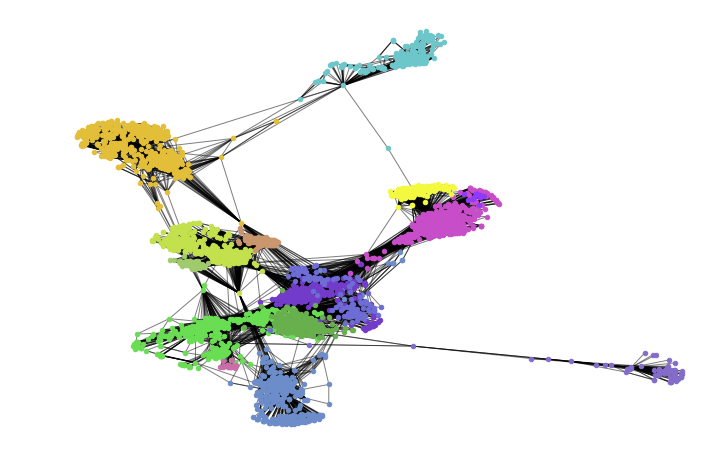

In [13]:
#partition = community.best_partition(sms)
colormap = np.array(["#6d8dca", "#69de53", "#723bca", "#c3e14c", "#c84dc9", "#68af4e", "#6e6cd5", "#e3be38","#a1ca6d" , "#ca966d" , "#ca6da9" , "#846dca" , "#6dc6ca" , "#f3f93e","#8f3aff"])


plt.figure(figsize=(12,8))
pos = nx.spring_layout(sms)

count = 0
for com in set(partition.values()) :
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(sms, pos, list_nodes, node_size = 20, node_color = colormap[count])
    count = count + 1

nx.draw_networkx_edges(sms, pos, alpha=0.5)
plt.axis('off')
plt.show()

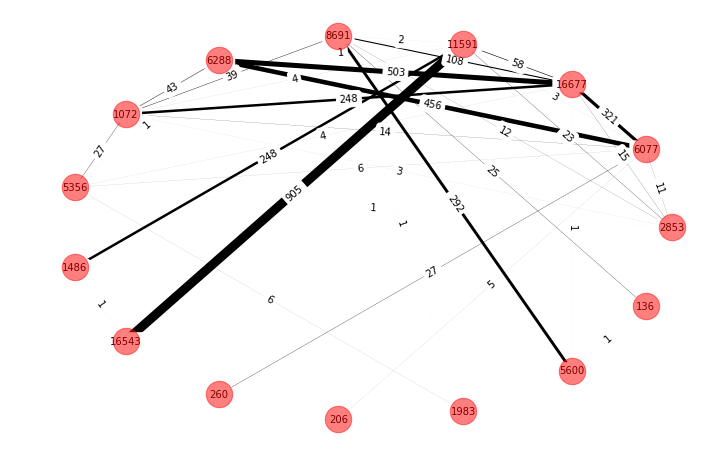

In [14]:
def plot_graph(G):
    plt.figure(figsize=(12,8))
    pos = nx.circular_layout(G)
    
    # plot nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, alpha=0.5)
    
    # plot edges with widths depending on weights
    nx.draw_networkx_edges(G, pos, width = [d['weight']/100 for u,v,d in G.edges(data=True)])

    # add edges' labels with weights
    edge_labels=dict([((u,v), d['weight']) for u,v,d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.axis('off')
    plt.show()

sms_com = community.induced_graph(partition, sms)
plot_graph(sms_com)